In [22]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from scipy import stats
from scipy.spatial import distance


## Loading and join the four results (for each feature set)

In [5]:
samples=15
resultsTest=pd.read_csv("Test5/ResultsExperiment/NinaNew_FeatureSet_1_startPerson_1_endPerson_1.csv")
if len(resultsTest)!=samples:
    print('error'+' 1'+' 1')
    print(len(resultsTest))

for i in range(2,11):
    auxFrame=pd.read_csv("Test5/ResultsExperiment/NinaNew_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
    resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
    if len(auxFrame)!=samples:
        print('error'+' 1 '+str(i))
        print(len(auxFrame))
for j in range(2,4):
    for i in range(1,11):
        auxFrame=pd.read_csv("Test5/ResultsExperiment/NinaNew_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        
        if len(auxFrame)!=samples:
            print('error'+' '+str(j)+' '+str(i))
            print(len(auxFrame))

resultsTest1=resultsTest.copy()
resultsTest1.drop(columns='Unnamed: 0')



,person,subset,# shots,Feature Set,AccLDAInd,AccLDALiu,AccLDA10BB,AccLDA11BB,AccQDAInd,AccQDALiu,...,AccKNNInd,AccKNNIndGen,AccKNNLiu,AccKNN10BB,AccKNN11BB,AccSVMInd,AccSVMGIndGen,AccSVMLiu,AccSVM10BB,AccSVM11BB
0,1,"(1,)",1,1,0.504437,0.470116,0.464005,0.479491,0.421145,0.415202,...,0.517747,0.523857,0.453708,0.470618,0.482170,0.539595,0.534070,0.500167,0.494810,0.511887
1,1,"(2,)",1,1,0.542414,0.507549,0.521895,0.528401,0.447744,0.455668,...,0.575277,0.598132,0.500292,0.516390,0.520978,0.592293,0.596380,0.523396,0.539828,0.554592
2,1,"(3,)",1,1,0.533317,0.491051,0.508109,0.505924,0.473490,0.443828,...,0.571297,0.580708,0.500462,0.522645,0.522981,0.596336,0.579111,0.522477,0.538778,0.538106
3,1,"(4,)",1,1,0.556280,0.519014,0.530363,0.538748,0.483866,0.464555,...,0.623783,0.628271,0.517066,0.537647,0.544507,0.634115,0.621919,0.537817,0.552215,0.569154
4,1,"(1, 2)",2,1,0.556523,0.508341,0.511760,0.523469,0.501399,0.443477,...,0.594964,0.602943,0.490830,0.502953,0.511139,0.623044,0.630194,0.527821,0.539840,0.549062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,10,"(1, 2, 3)",3,3,0.616745,0.481005,0.494009,0.515488,0.622881,0.513442,...,0.564144,0.596143,0.451636,0.456897,0.478229,0.618790,0.632086,0.488165,0.499562,0.520164
446,10,"(1, 2, 4)",3,3,0.640093,0.493503,0.510878,0.528398,0.649146,0.516134,...,0.591765,0.608702,0.455249,0.461819,0.488392,0.656300,0.661410,0.515112,0.523434,0.551175
447,10,"(1, 3, 4)",3,3,0.601847,0.468466,0.482670,0.497727,0.630540,0.493040,...,0.562926,0.578977,0.427983,0.443040,0.463920,0.630824,0.637358,0.471023,0.474716,0.507812
448,10,"(2, 3, 4)",3,3,0.600766,0.469770,0.478711,0.501561,0.639796,0.496736,...,0.563298,0.585580,0.433295,0.458984,0.473034,0.626880,0.637383,0.469912,0.495884,0.516463


In [4]:
samples=15
resultsTest=pd.read_csv("Test8LDAQDA_r/ResultsExperiment/NinaNew_FeatureSet_1_startPerson_1_endPerson_1.csv")
if len(resultsTest)!=samples:
    print('error'+' 1'+' 1')
    print(len(resultsTest))

for i in range(2,11):
    auxFrame=pd.read_csv("Test8LDAQDA_r/ResultsExperiment/NinaNew_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
    resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
    if len(auxFrame)!=samples:
        print('error'+' 1 '+str(i))
        print(len(auxFrame))
for j in range(2,4):
    for i in range(1,11):
        auxFrame=pd.read_csv("Test8LDAQDA_r/ResultsExperiment/NinaNew_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        
        if len(auxFrame)!=samples:
            print('error'+' '+str(j)+' '+str(i))
            print(len(auxFrame))

resultsTest2=resultsTest.copy()
resultsTest2.drop(columns='Unnamed: 0')


,person,subset,# shots,Feature Set,AccLDAInd,AccLDALiu,AccLDA10BB,AccLDA11BB,AccLDA10BBcl,AccLDA11BBcl,...,AccSVM10BBq,AccSVM11BBq,r10BBl,r11BBl,r10BBq,r11BBq,r10BBlmean,r11BBlmean,r10BBqmean,r11BBqmean
0,1,"(1,)",1,1,0.519839,0.475975,0.522267,0.514566,0.823529,0.788235,...,0.513561,0.519002,[0.62647377 0.97987719 0.62165793 1. 0...,[0.52567 1. 0.5 1. 1...,[0.84040749 0.97183099 0.80926445 0.9684556 0...,[0.72977152 0.96078431 0.53333333 1. 0...,0.863316,0.791179,0.889717,0.808128
1,1,"(2,)",1,1,0.549504,0.511886,0.567270,0.575528,0.847059,0.882353,...,0.596463,0.597548,[0.67346359 0.96984232 0.62729899 1. 0...,[0.50265353 1. 0.5 1. 0...,[0.87758587 1. 0.68677447 0.99117529 0...,[0.57355596 0.91541756 0.51087918 1. 0...,0.857573,0.810944,0.899481,0.794416
2,1,"(3,)",1,1,0.526426,0.505084,0.544996,0.549366,0.729412,0.717647,...,0.589026,0.581548,[0.5916104 0.93577285 0.63041436 0.98102078 0...,[0.52703637 0.68078431 0.497269 1. 1...,[0.82328978 0.87346556 0.77530078 0.98489831 1...,[0.64487744 0.65656566 0.5106383 0.96575847 1...,0.868583,0.791799,0.900394,0.784092
3,1,"(4,)",1,1,0.550606,0.522995,0.560091,0.562802,0.835294,0.835294,...,0.617769,0.609554,[0.62150263 0.93516814 0.6646625 1. 0...,[0.52003212 0.74576271 0.5 1. 1...,[0.79569043 0.91734445 0.73252202 1. 1...,[0.61715481 0.86885246 0.50285572 0.96420745 1...,0.859893,0.804874,0.885647,0.788591
4,1,"(1, 2)",2,1,0.563465,0.519428,0.575174,0.580458,0.838235,0.852941,...,0.629261,0.622319,[0.6626982 0.96999032 0.62347331 1. 0...,[0.53249851 0.96050955 0.5 1. 1...,[0.85893936 0.99023802 0.81815071 1. 0...,[0.67026811 0.95502779 0.54621849 1. 0...,0.852020,0.785538,0.925780,0.818816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,10,"(1, 2, 3)",3,3,0.615868,0.478375,0.609731,0.594243,0.901961,0.862745,...,0.623758,0.595412,[0.81265558 0.9607793 0.92016672 0.98641087 1...,[0.53956835 0.85361723 0.62542339 1. 1...,[0.73783477 0.96268495 0.79207489 0.92868566 1...,[0.50494256 0.59748428 0.50792993 0.6610483 0...,0.924021,0.833603,0.849549,0.657949
446,10,"(1, 2, 4)",3,3,0.634107,0.491167,0.626223,0.614834,0.960784,0.941176,...,0.651190,0.621405,[0.79880563 0.96537999 0.89943344 0.98958333 1...,[0.52057485 0.95386703 0.60130011 1. 1...,[0.71667341 0.96449599 0.75019495 0.92896647 0...,[0.5000672 0.64156471 0.51364366 0.68295905 0...,0.919682,0.830709,0.846684,0.661825
447,10,"(1, 3, 4)",3,3,0.607102,0.468608,0.607528,0.594602,0.921569,0.921569,...,0.613636,0.581818,[0.7924417 0.96066988 0.91395947 0.9778361 1...,[0.52264654 0.88222879 0.59359812 1. 1...,[0.71728551 0.95709566 0.78381898 0.91918343 0...,[0.51072961 0.60408163 0.50256307 0.66740576 0...,0.912951,0.821447,0.835990,0.636625
448,10,"(2, 3, 4)",3,3,0.598496,0.469628,0.600057,0.582458,0.941176,0.980392,...,0.604598,0.582884,[0.79529944 0.96142915 0.90729021 0.98028674 1...,[0.51961284 0.71976401 0.5698119 1. 1...,[0.69561133 0.93421969 0.79979975 0.9241833 0...,[0.51596218 0.59349593 0.51322751 0.66326531 0...,0.918408,0.805007,0.829252,0.629582


In [23]:
results= pd.DataFrame(columns=['Data set', 'Feature Set', '# shots','Classifier'])

                                         

idx=0
for i in range(1,5):
    for j in range(1,4):
        
        results.at[idx,'rPropo1LDA']=resultsTest2['r10BBlmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        results.at[idx,'rPropo2LDA']=resultsTest2['r11BBlmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        results.at[idx,'rPropo1QDA']=resultsTest2['r10BBqmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        results.at[idx,'rPropo2QDA']=resultsTest2['r11BBqmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        
#         results.at[idx,'rPropo1LDAVec']=resultsTest2['r10BBl'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#         results.at[idx,'rPropo2LDAVec']=resultsTest2['r11BBl'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#         results.at[idx,'rPropo1QDAVec']=resultsTest2['r10BBq'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#         results.at[idx,'rPropo2QDAVec']=resultsTest2['r11BBq'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
         
        
        
        for k in range(0,4):
            if k==0:
                classifier='LDA'
                indi='AccLDAInd'
                indiGen='AccLDAInd'
                liu='AccLDALiu'            
                
                prosed10BBLDA='AccLDA10BB'                
                prosed11BBLDA='AccLDA11BB'
                prosed10BBLDAcl='AccLDA10BBcl'                
                prosed11BBLDAcl='AccLDA11BBcl'
                
                results.at[idx,'Classifier']=classifier
                results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


                results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
                if stats.wilcoxon(resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values
                                  ,resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values)[1]<0.05 and results.at[idx,'Prop1LDA']>results.at[idx,'IndPca'] :
                    results.at[idx,'W10BBL']=1
                else:
                    results.at[idx,'W10BBL']=0
                    
                if stats.ttest_ind(resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values
                                  ,resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values)[1]<0.05 and results.at[idx,'Prop1LDA']>results.at[idx,'IndPca'] :
                    results.at[idx,'T10BBL']=1
                else:
                    results.at[idx,'T10BBL']=0
                
                
            elif k==1:
                classifier='QDA'
                indi='AccQDAInd'
                indiGen='AccQDAInd'
                liu='AccQDALiu'    
                
                prosed10BBQDA='AccQDA10BB'                
                prosed11BBQDA='AccQDA11BB'
                prosed10BBQDAcl='AccQDA10BBcl'                
                prosed11BBQDAcl='AccQDA11BBcl'
                
                results.at[idx,'Classifier']=classifier
                results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


#                 results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

#                 results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
                if stats.wilcoxon(resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values
                                  ,resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values)[1]<0.05 and results.at[idx,'Prop1QDA']>results.at[idx,'IndPca'] :
                    results.at[idx,'W10BBQ']=1
                else:
                    results.at[idx,'W10BBQ']=0           
                if stats.ttest_ind(resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values
                                  ,resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].values)[1]<0.05 and results.at[idx,'Prop1QDA']>results.at[idx,'IndPca'] :
                    results.at[idx,'T10BBQ']=1
                else:
                    results.at[idx,'T10BBQ']=0
                
                
            elif k==2:
                classifier='KNN'
                indi='AccKNNInd'
                indiGen='AccKNNInd'
                liu='AccKNNLiu'               
                
                prosed10BBLDA='AccKNN10BBl'                
                prosed11BBLDA='AccKNN11BBl'
                prosed10BBQDA='AccKNN10BBq'                
                prosed11BBQDA='AccKNN11BBq'
                
                
                results.at[idx,'Classifier']=classifier
                results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


                results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

#                 results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
               
                
                
            else:
                classifier='SVM'
                indi='AccSVMInd'
                indiGen='AccSVMInd'
                liu='AccSVMLiu'               
                
                prosed10BBLDA='AccSVM10BBl'                
                prosed11BBLDA='AccSVM11BBl'
                prosed10BBQDA='AccSVM10BBq'                
                prosed11BBQDA='AccSVM11BBq'

                
                    
                    
                results.at[idx,'Classifier']=classifier
                results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


                results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

#                 results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
            
            
            
                
            results.at[idx,'Data set']='Nina5'
            results.at[idx,'Feature Set']=j
            results.at[idx,'# shots']=i
            idx+=1
        
results

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Data set,Feature Set,# shots,Classifier,rPropo1LDA,rPropo2LDA,rPropo1QDA,rPropo2QDA,Ind,IndGen,...,Prop1LDAcl,Prop2LDAcl,W10BBL,T10BBL,Prop1QDA,Prop2QDA,Prop1QDAcl,Prop2QDAcl,W10BBQ,T10BBQ
0,Nina5,1,1,LDA,0.893702,0.763917,0.835041,0.678161,0.499790,0.499790,...,0.781471,0.780294,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Nina5,1,1,QDA,NaN,NaN,NaN,NaN,0.433147,0.433147,...,NaN,NaN,NaN,NaN,0.524340,0.530252,0.786471,0.790588,1.0,1.0
2,Nina5,1,1,KNN,NaN,NaN,NaN,NaN,0.523975,0.523975,...,NaN,NaN,NaN,NaN,0.539552,0.527826,NaN,NaN,NaN,NaN
3,Nina5,1,1,SVM,NaN,NaN,NaN,NaN,0.537681,0.537681,...,NaN,NaN,NaN,NaN,0.552264,0.544145,NaN,NaN,NaN,NaN
4,Nina5,2,1,LDA,0.895874,0.769155,0.687205,0.546623,0.512882,0.512882,...,0.813235,0.811471,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Nina5,2,1,QDA,NaN,NaN,NaN,NaN,0.419701,0.419701,...,NaN,NaN,NaN,NaN,0.480442,0.495378,0.721471,0.741765,1.0,1.0
6,Nina5,2,1,KNN,NaN,NaN,NaN,NaN,0.421007,0.421007,...,NaN,NaN,NaN,NaN,0.467772,0.453987,NaN,NaN,NaN,NaN
7,Nina5,2,1,SVM,NaN,NaN,NaN,NaN,0.465360,0.465360,...,NaN,NaN,NaN,NaN,0.506218,0.499048,NaN,NaN,NaN,NaN
8,Nina5,3,1,LDA,0.897263,0.759763,0.660448,0.515356,0.535142,0.535142,...,0.830000,0.825588,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Nina5,3,1,QDA,NaN,NaN,NaN,NaN,0.480883,0.480883,...,NaN,NaN,NaN,NaN,0.518891,0.523109,0.779118,0.792647,1.0,1.0


## Results of each feature set and each shot (Mean and Median of the Accuracies, T-test, and Wilcoxon test) 

In [24]:
def graphIndividuals(Classifier,FeatureSet):
    
    shot=np.arange(1,5)
    
    
    Model='Ind'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Model='IndGen'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Model='IndPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Model='IndGenPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center



    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(loc='best')
    plt.title('Analysis of Individuals (' + Classifier + ' ' + str(FeatureSet) + ')')
    plt.show()



<IPython.core.display.Javascript object>


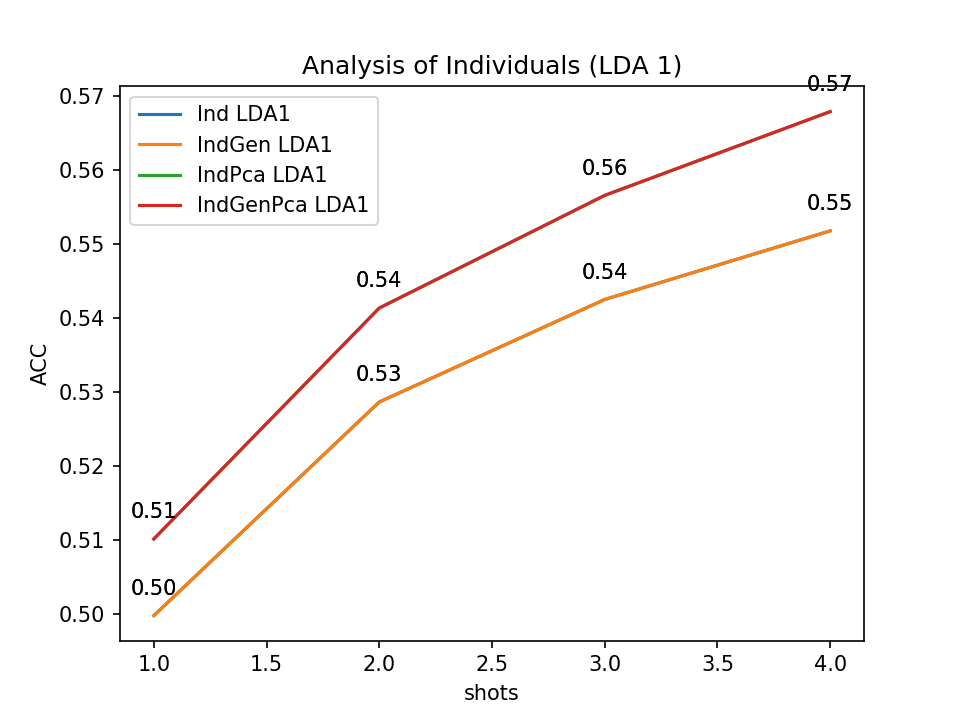

In [25]:
Classifier='LDA'
graphIndividuals(Classifier,1)

<IPython.core.display.Javascript object>


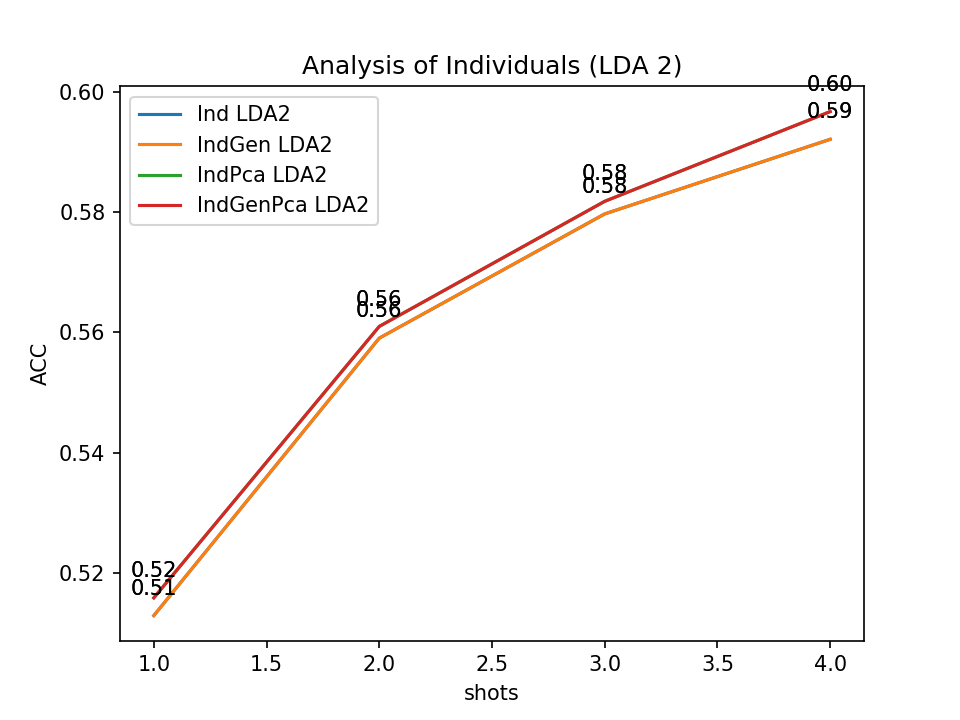

In [26]:
Classifier='LDA'
graphIndividuals(Classifier,2)

<IPython.core.display.Javascript object>


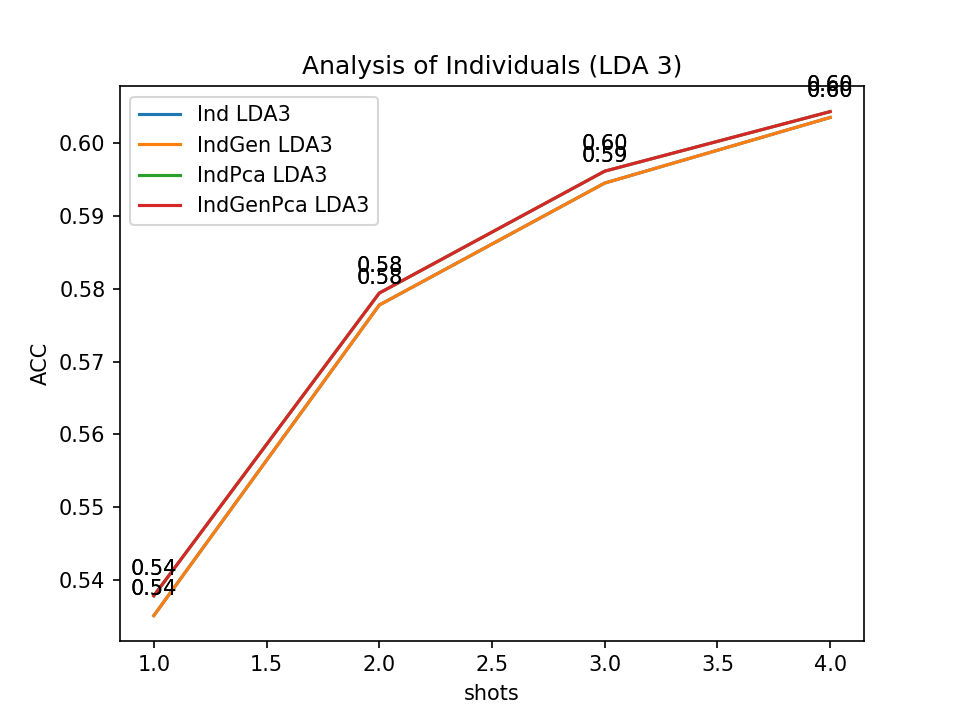

In [27]:
Classifier='LDA'
graphIndividuals(Classifier,3)

<IPython.core.display.Javascript object>


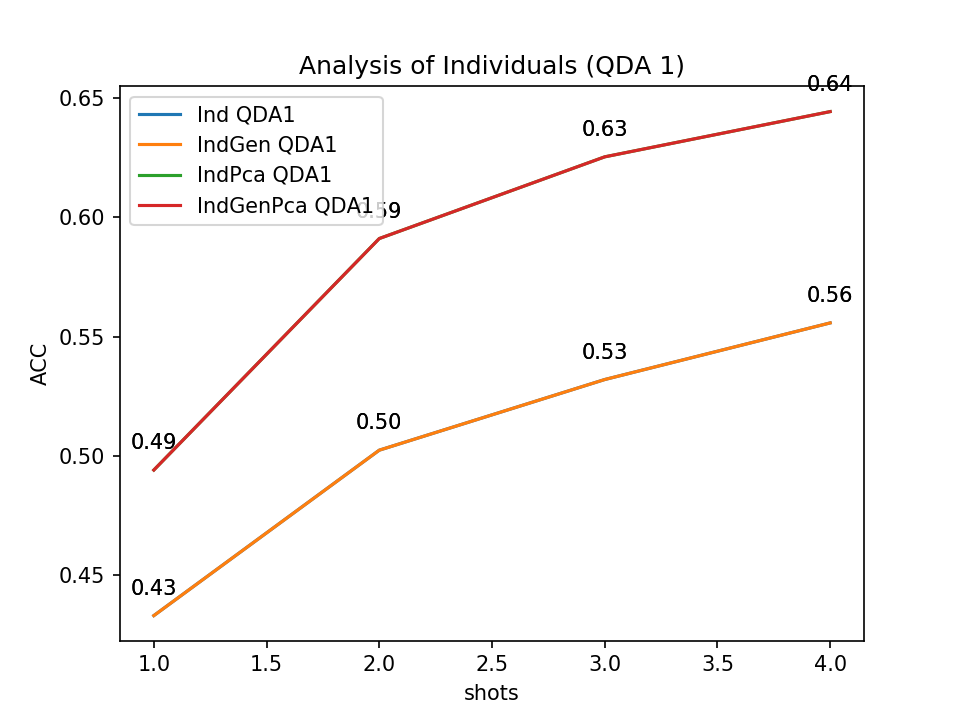

In [28]:
Classifier='QDA'
graphIndividuals(Classifier,1)

<IPython.core.display.Javascript object>


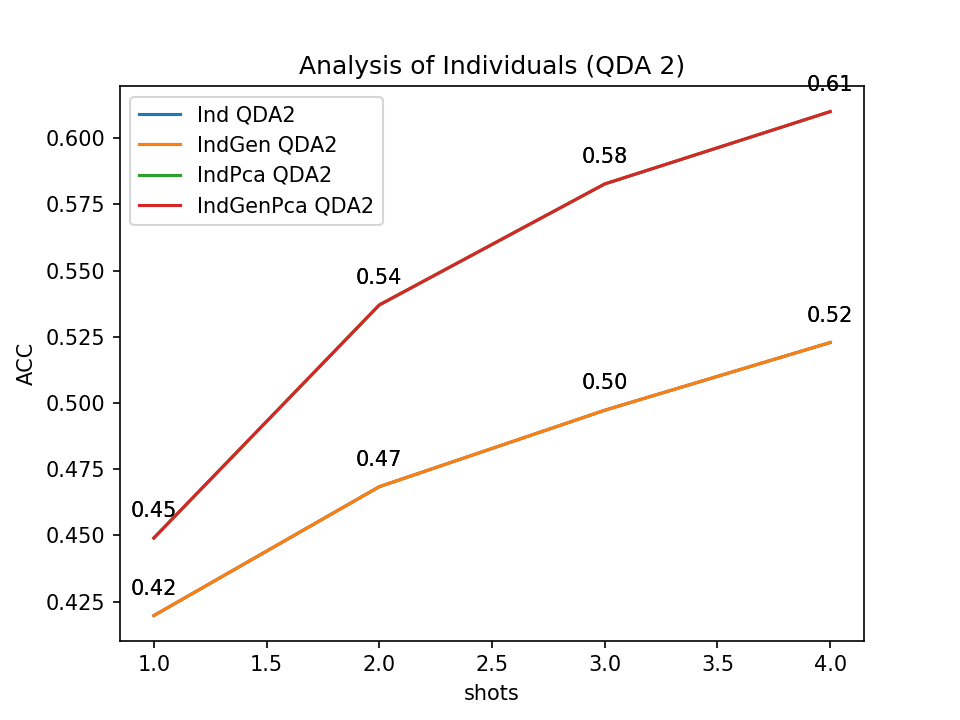

In [29]:
Classifier='QDA'
graphIndividuals(Classifier,2)

<IPython.core.display.Javascript object>


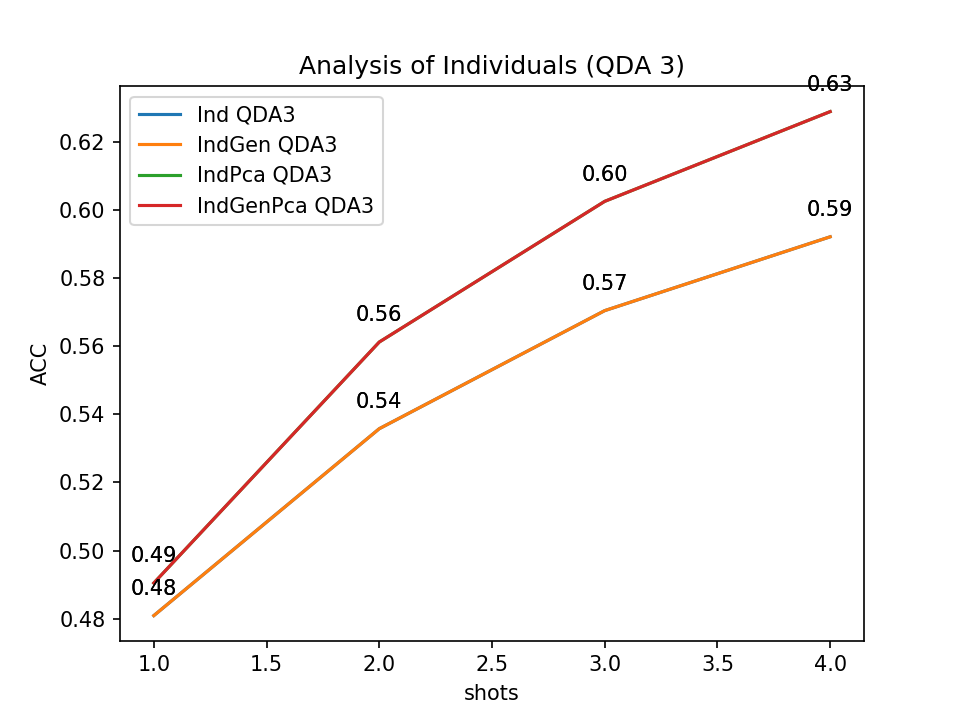

In [30]:
Classifier='QDA'
graphIndividuals(Classifier,3)

In [59]:
def labelPoint(xs,ys,ax1):
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center




def graphsComparation(FeatureSet):

    shot=np.arange(1,5)


    y10BBL=np.array(results['Prop1LDA'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    yLiu=np.array(results['liuPca'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    yLDA=np.array(results['IndPca'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])

    y10BBQ=np.array(results['Prop1QDA'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='QDA'])
    yLiuQDA=np.array(results['liuPca'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='QDA'])
    yQDA=np.array(results['IndPca'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='QDA'])



    r10BBL=np.array(results['rPropo1LDA'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    r10BBQ=np.array(results['rPropo1QDA'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    rLiu=np.ones(4)*0.5

    r10BBL=np.array(results['rPropo1LDA'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    r10BBQ=np.array(results['rPropo1QDA'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])

    W10BBL=np.array(results['W10BBL'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    T10BBL=np.array(results['T10BBL'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    W10BBQ=np.array(results['W10BBQ'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='QDA'])
    T10BBQ=np.array(results['T10BBQ'].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='QDA'])



    fig2, ((ax1, ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 8))

    ax1.plot(shot, y10BBL, label='PropoLDA')
    labelPoint(shot,y10BBL,ax1)
    ax1.plot(shot, yLiu, label='Liu')
    labelPoint(shot,yLiu,ax1)
    ax1.plot(shot, yLDA, label='LDA')
    labelPoint(shot,yLDA,ax1)
    ax1.set_title('LDA Feature Set: ' + str(FeatureSet)+ ' Accuracy vs Shots \n H=1(Statistically significant result (95% confidence))')
    ax1.grid()
    ax1.legend(bbox_to_anchor=(1.3, 1.0), loc='upper right')
#     ax1.set_xlabel('# shots')
    ax1.set_ylabel('Acc')
    
    
    ax2 = ax1.twinx()
    ax2.plot(shot, T10BBL, label='T-test', linestyle=':',color='red')
    ax2.legend(bbox_to_anchor=(1.3, 0.7), loc='upper right')
    ax2.set_ylabel('H')    
    ax2.set_ylim([-0.1, 1.1])

    ax3.plot(shot, r10BBL , label='(1-r)LDA')
    ax3.plot(shot, rLiu, label='(1-r)Liu')
    ax3.set_title('Weight of the current shots (1-r)')
    ax3.grid()
    ax3.legend(loc='best')
    ax3.set_xlabel('# shots')
    ax3.set_ylabel('1-r')
    
    fig2.tight_layout(pad=2.0)


    fig3, ((ax1, ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 8))

    ax1.plot(shot, y10BBQ, label='PropoQDA')
    labelPoint(shot,y10BBQ,ax1)
    ax1.plot(shot, yLiuQDA, label='LiuQDA')
    labelPoint(shot,yLiuQDA,ax1)
    ax1.plot(shot, yQDA, label='QDA')
    labelPoint(shot,yQDA,ax1)
    ax1.set_title('QDA Feature Set: ' + str(FeatureSet)+ ' Accuracy vs Shots \n H=1(Statistically significant result (95% confidence))')
    ax1.grid()
    ax1.legend(bbox_to_anchor=(1.3, 1.0), loc='upper right')
#     ax1.set_xlabel('# shots')
    ax1.set_ylabel('Acc')

    ax2 = ax1.twinx()
    ax2.plot(shot, T10BBQ, label='T-test', linestyle=':',color='red')
    ax2.legend(bbox_to_anchor=(1.3, 0.7), loc='upper right')
    ax2.set_ylabel('H')    
    ax2.set_ylim([-0.1, 1.1])

    ax3.plot(shot, r10BBQ, label='(1-r)QDA')
    ax3.plot(shot, rLiu, label='(1-r)LiuQDA')
    ax3.set_title('Weight of the current shots (1-r)')
    ax3.grid()
    ax3.legend(loc='best',)
    ax3.set_xlabel('# Shots')
    ax3.set_ylabel('1-r')
#     ax3.xaxis.set_major_locator(mticker.MultipleLocator(1))
    
    fig3.tight_layout(pad=2.0)
    
    
    
    plt.show()





# Feature Set 1:
1. Mean Absolute Value (MAV)

<IPython.core.display.Javascript object>


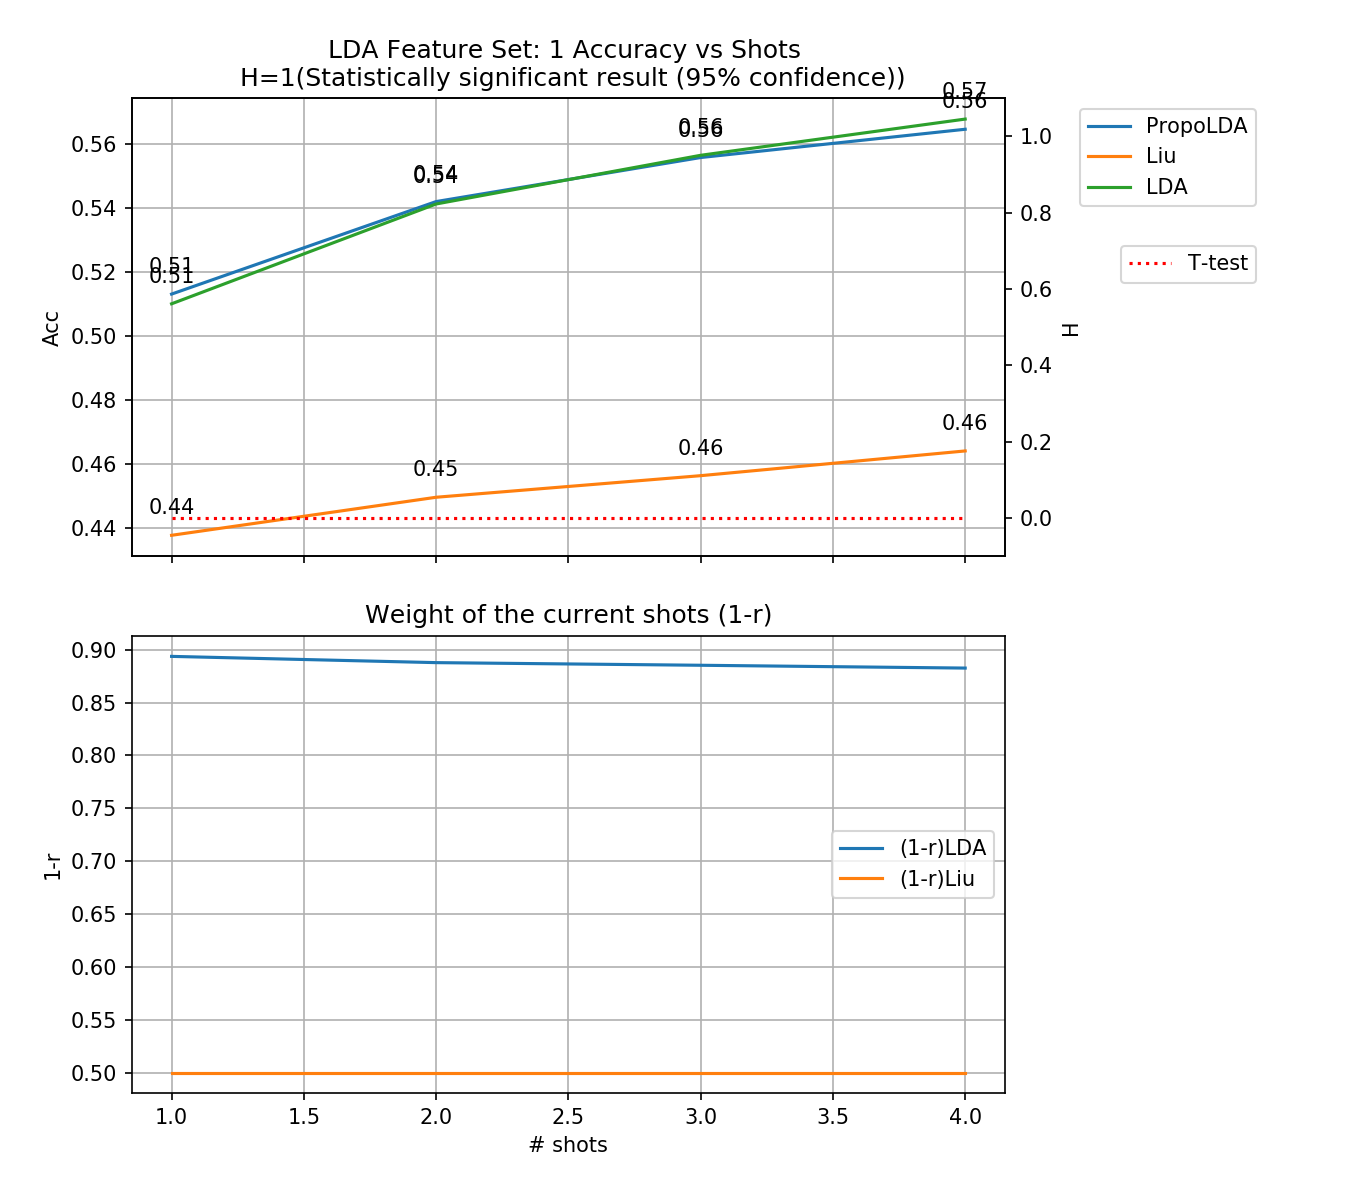

<IPython.core.display.Javascript object>


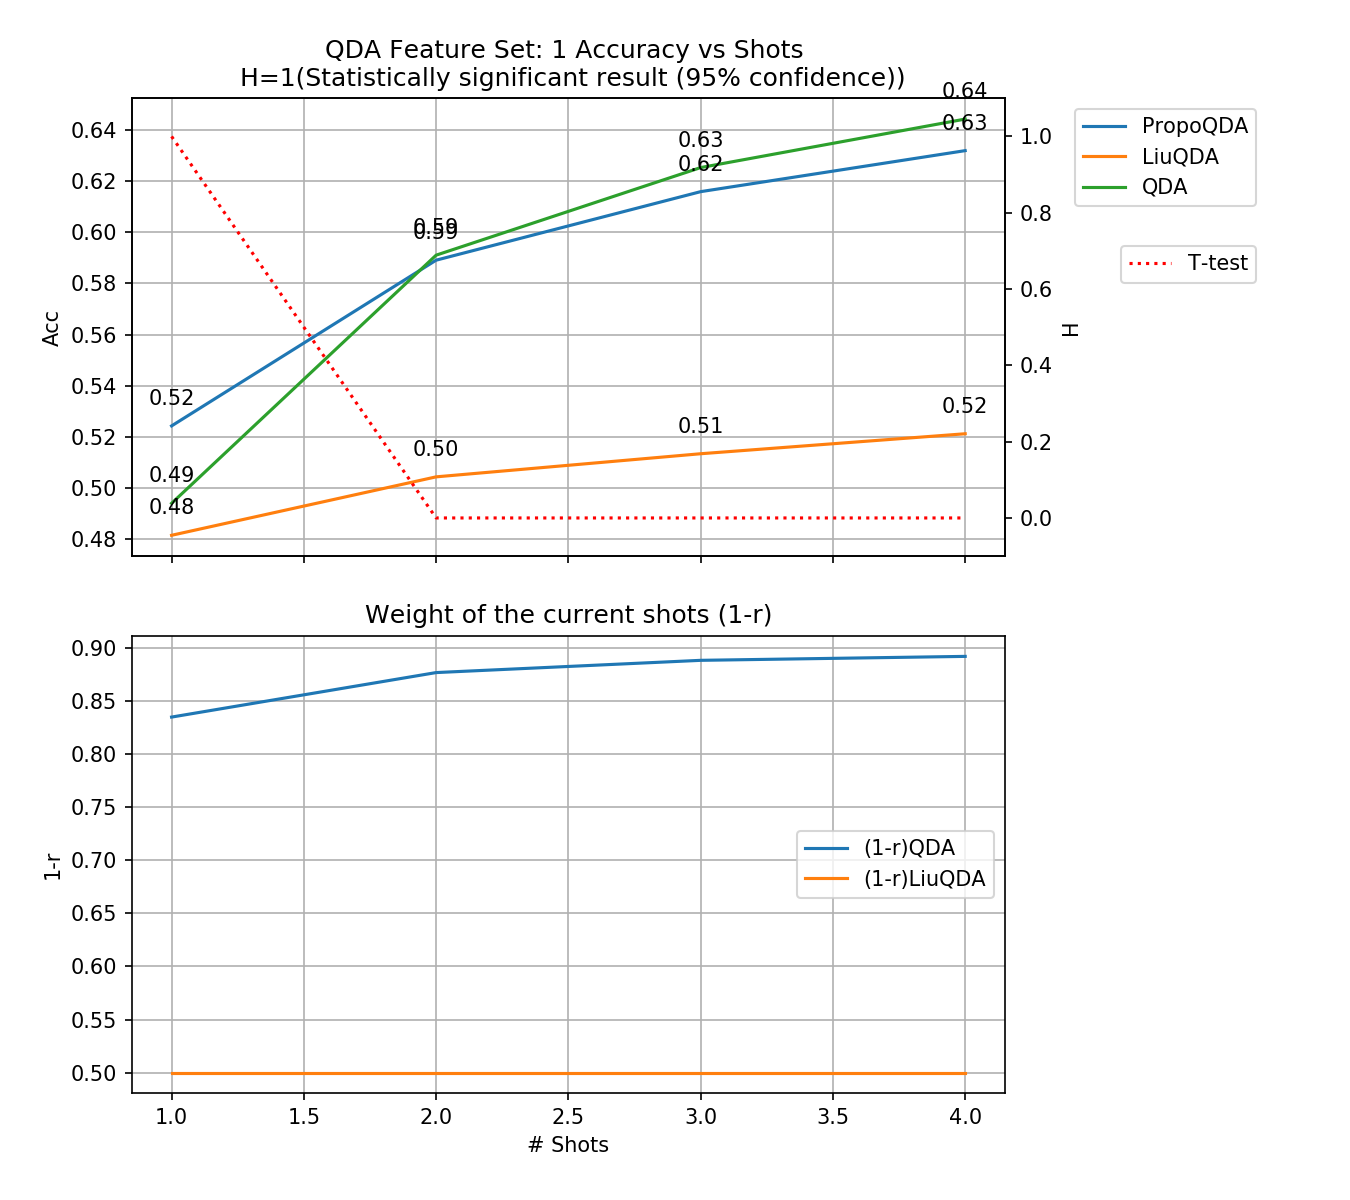

In [60]:
graphsComparation(1)

# Feature Set 2:
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

<IPython.core.display.Javascript object>


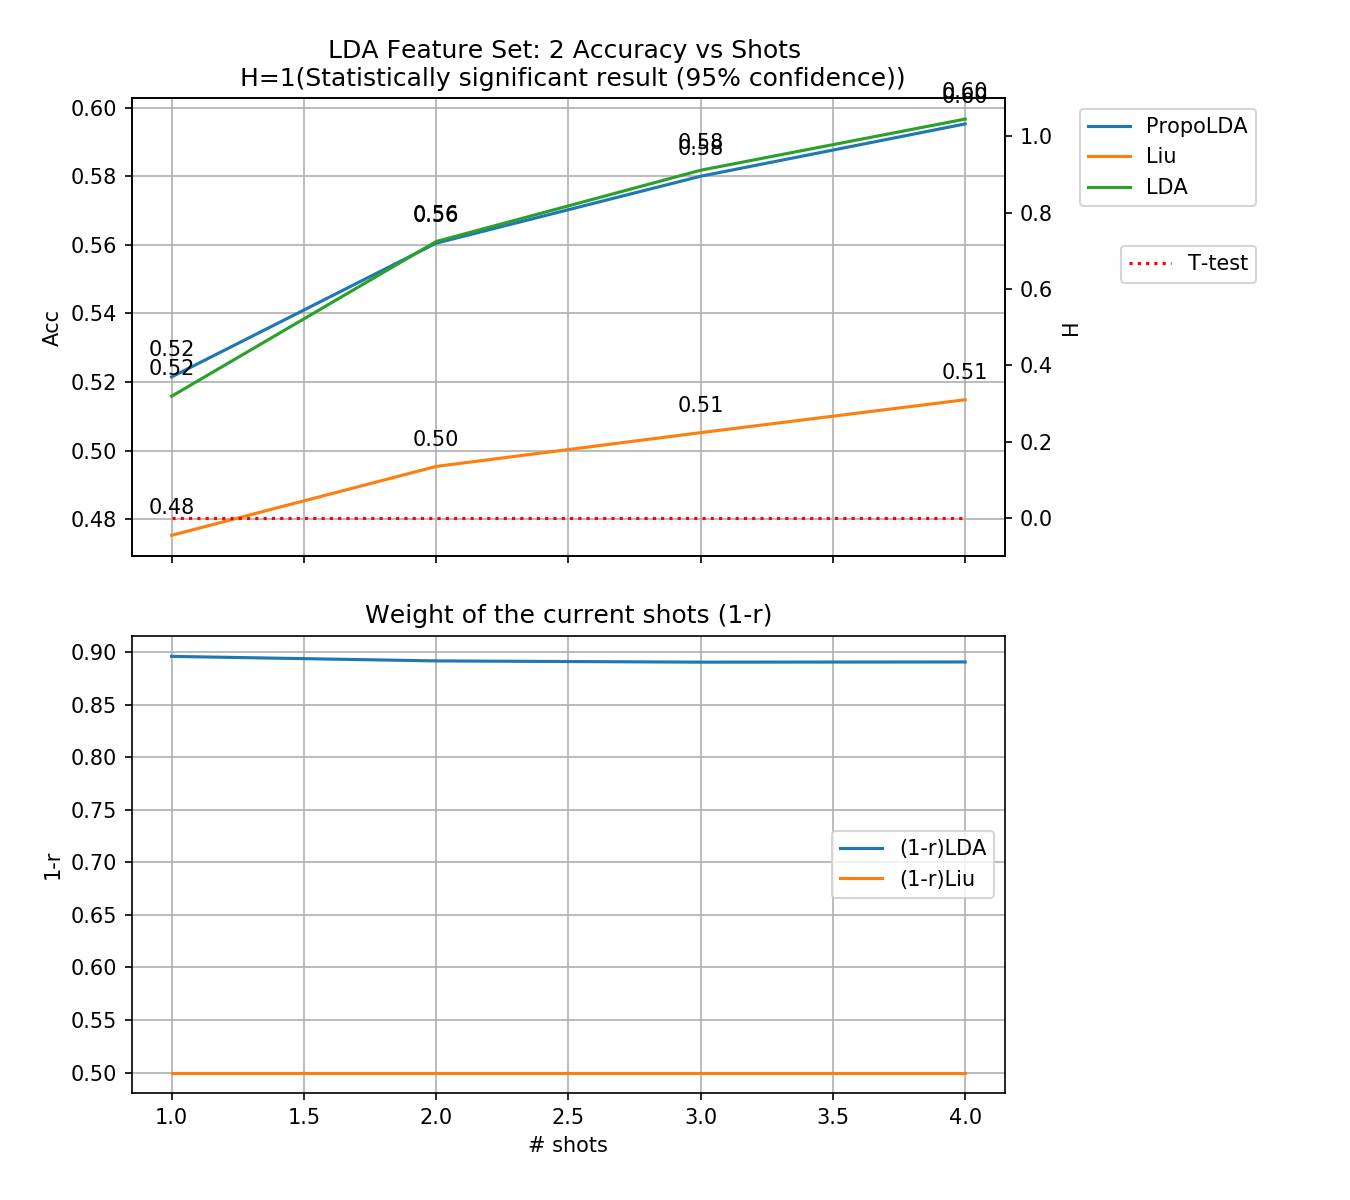

<IPython.core.display.Javascript object>


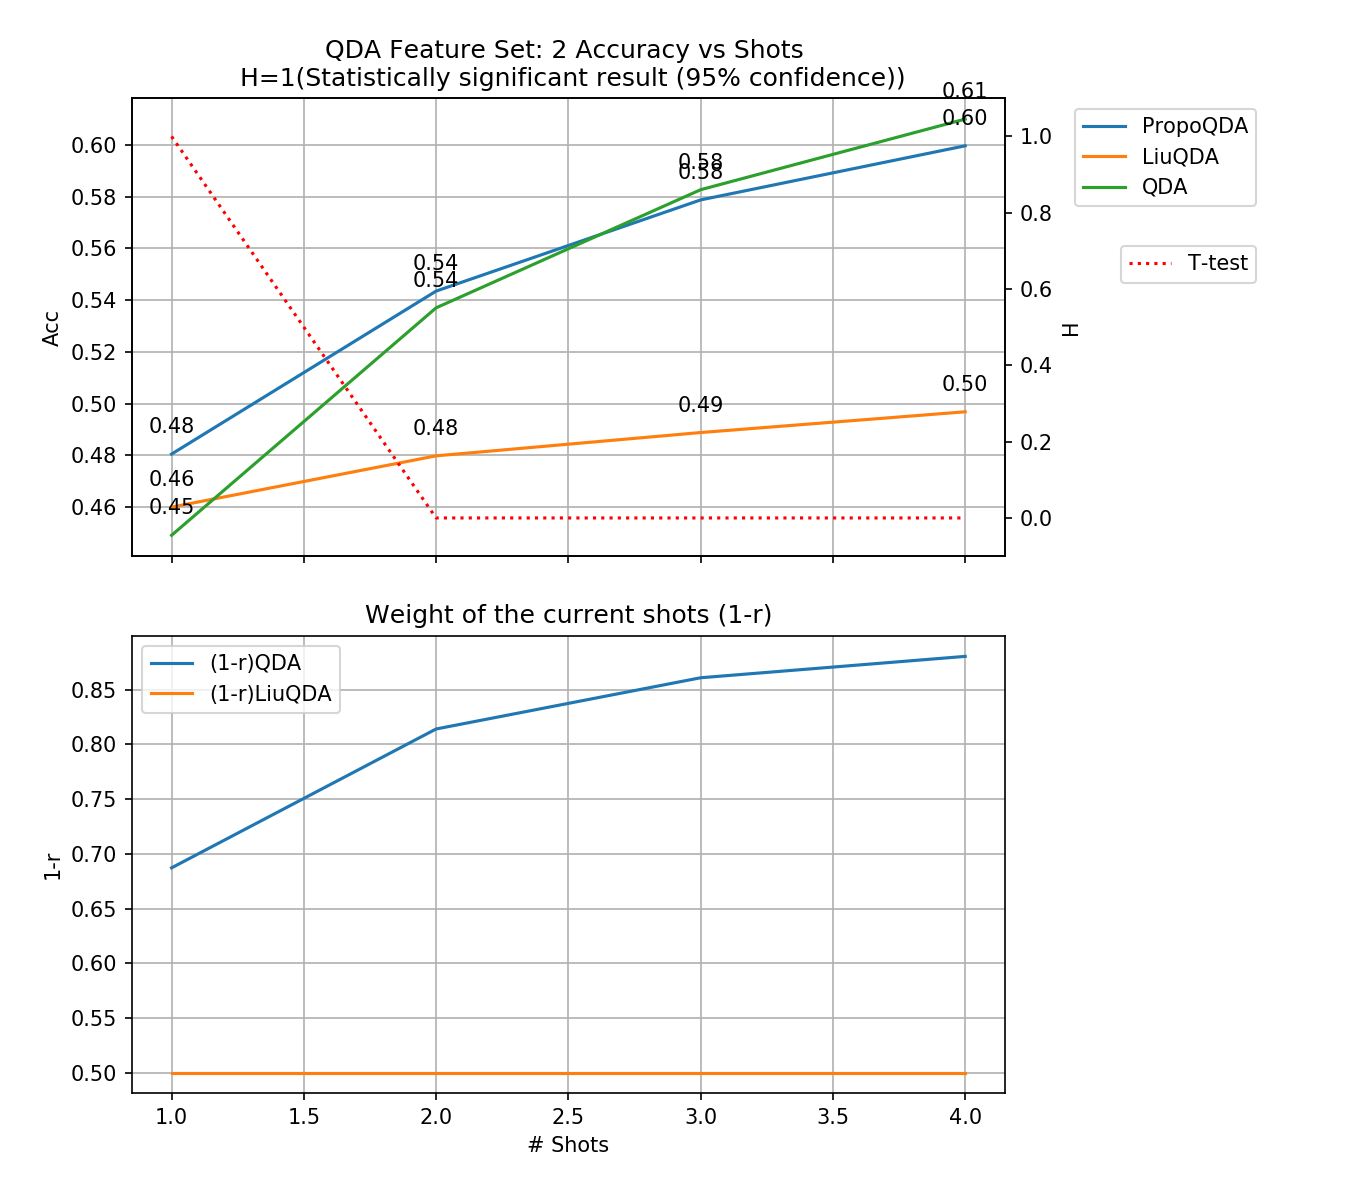

In [61]:
graphsComparation(2)

# Feature Set 3:
1. L-scale (LS)
2. Maximum fractal length (MFL)
4. Willison amplitude (WAMP)

<IPython.core.display.Javascript object>


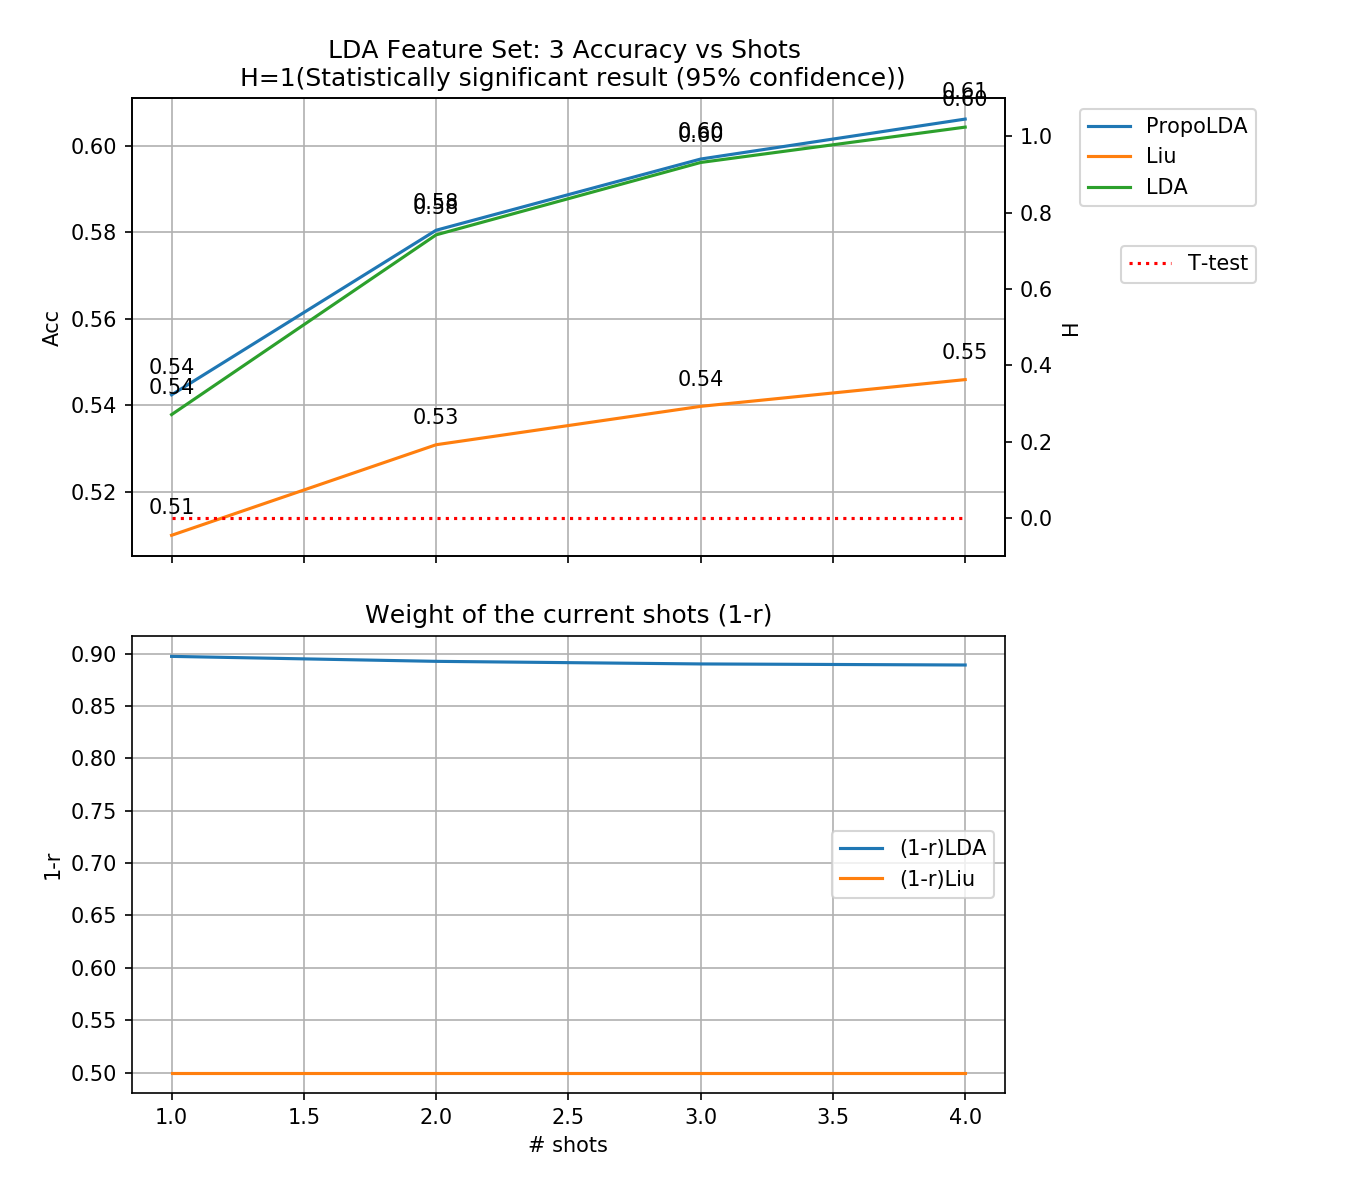

<IPython.core.display.Javascript object>


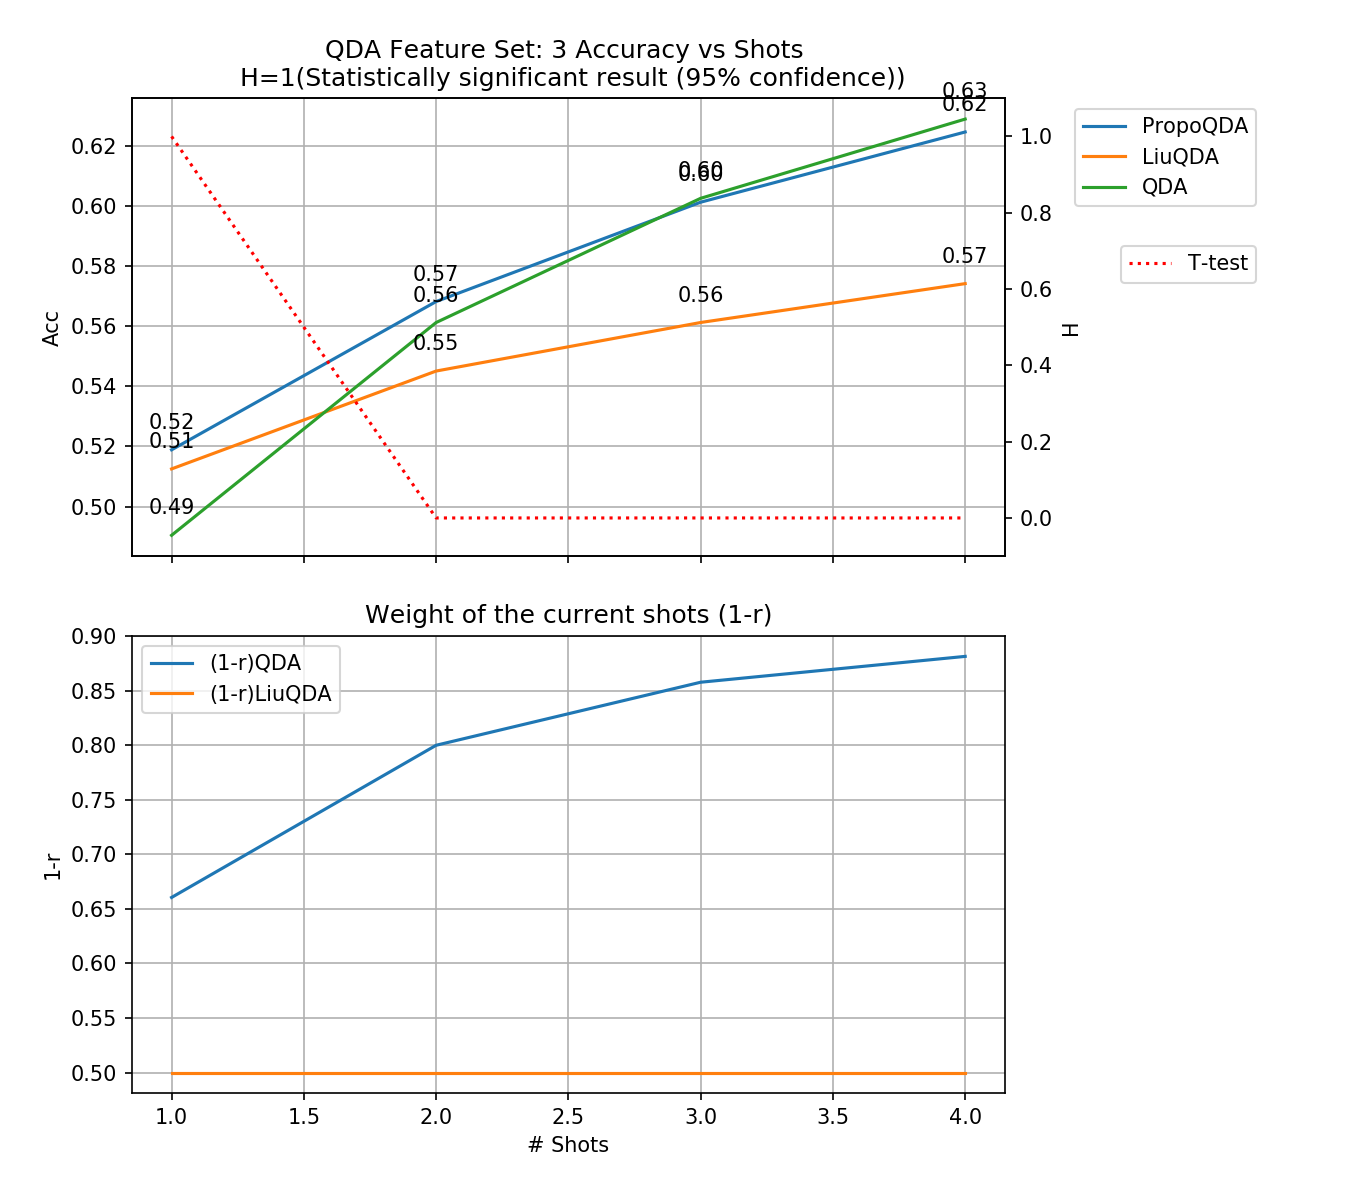

In [62]:
graphsComparation(3)

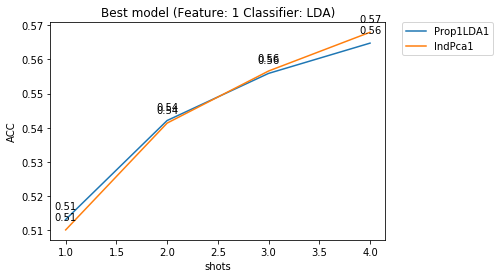

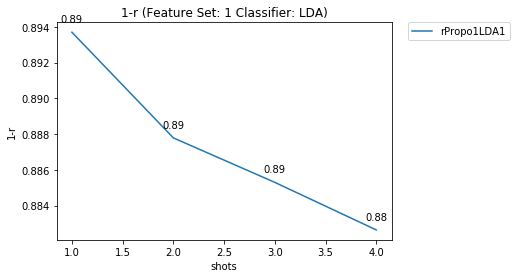

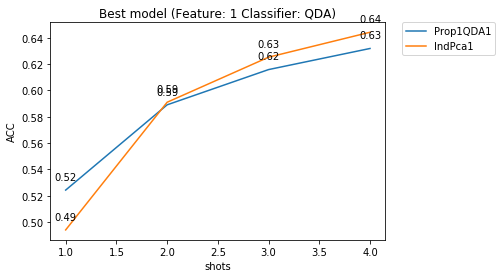

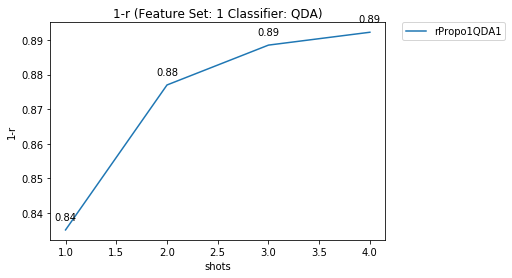

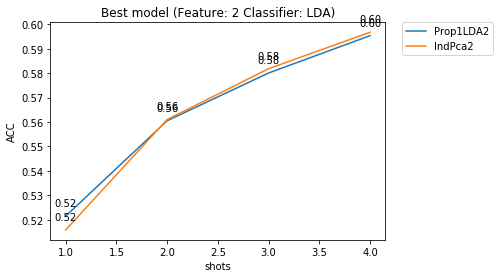

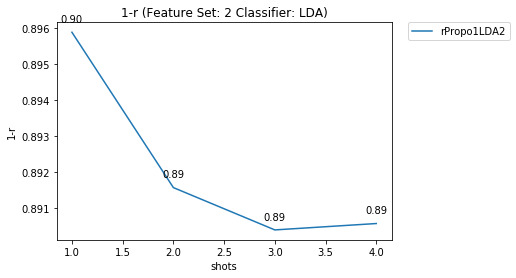

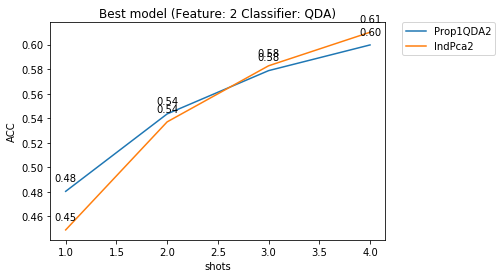

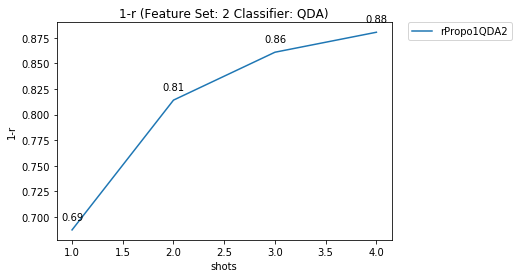

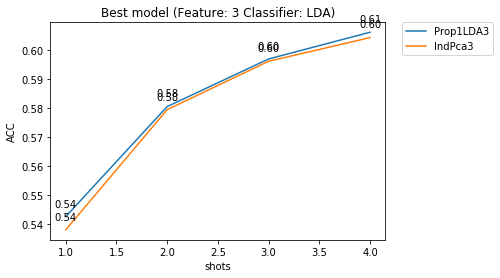

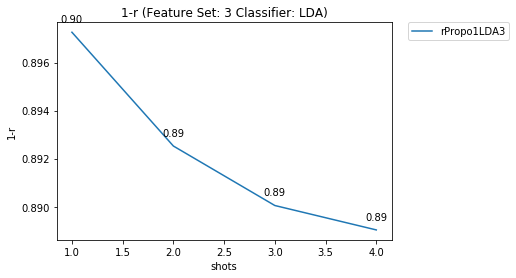

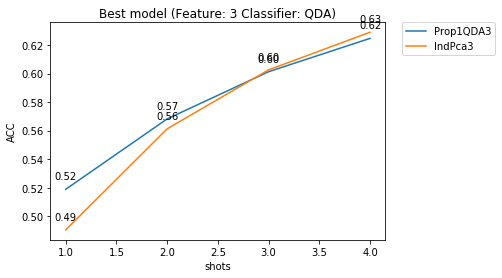

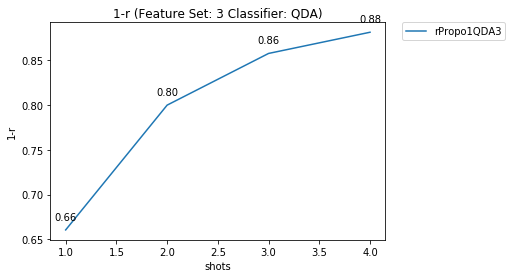

In [18]:
def graphIndivsPropo(FeatureSet,Classifier):
    shot=np.arange(1,5)
    
     #PROPOSED MODELS
    
    Model='Prop1'+Classifier
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        

    
    
    #INDIVIDUAL
    
    Model='IndPca'
    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
 
        
        
    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Best model (Feature: ' + str(FeatureSet) + ' Classifier: ' + Classifier + ')')
    plt.show()

    
def graph1_R(FeatureSet,Classifier):
    
    shot=np.arange(1,5)

        
    Model='rPropo1'+Classifier    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    plt.plot(shot,Y,label=Model +str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        

    plt.xlabel('shots')
    plt.ylabel('1-r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('1-r (Feature Set: ' + str(FeatureSet) + ' Classifier: '+Classifier+')')
    plt.show()

for featureSet in range(1,4):
    graphIndivsPropo(featureSet,'LDA')
    graph1_R(featureSet,'LDA')
    graphIndivsPropo(featureSet,'QDA')
    graph1_R(featureSet,'QDA')
    

